In [39]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import networkx as nx
import numpy as np
import pandas as pd
from pyvis.network import Network

colormap = plt.cm.tab20

def str_color(r, g, b, a):
    '''
    Convierte un color RGBA en formato decimal (0-1) a un c칩digo hexadecimal de color.
    - Toma los valores de rojo (r), verde (g), azul (b) y alfa (a) como entrada.
    - Convierte cada componente a un entero entre 0 y 255.
    - Retorna una cadena en formato hexadecimal, 칰til para colorear nodos en visualizaciones.
    '''
    return "#" + format(int(r*255), f'0{2}x') + format(int(g*255), f'0{2}x') + format(int(b*255), f'0{2}x') + format(int(a*255), f'0{2}x')

def assign_colors(values):
    '''
    Asigna colores a una lista de valores num칠ricos.
    - Usa un mapa de colores (colormap) para convertir cada valor en un color RGBA.
    - Convierte los colores RGBA a formato hexadecimal utilizando `str_color`.
    - Retorna una lista de colores en formato hexadecimal, que se puede usar para colorear nodos.
    '''
    colors = [str_color(*colormap(v)) for v in values]
    return colors

def draw_communities(coms, ax=None):
    '''
    Dibuja el grafo coloreando los nodos seg칰n sus comunidades.
    - `coms` es un diccionario que asigna cada nodo a una comunidad.
    - Los colores se asignan a los nodos en funci칩n de sus comunidades.
    - Calcula la modularidad ( Q ) de la partici칩n y la muestra como t칤tulo del gr치fico.
    - Si `ax` se proporciona, dibuja el grafo en ese eje; de lo contrario, usa la figura actual.
    '''
    colors = assign_colors([coms[n] for n in G.nodes()])
    nx.draw(G, with_labels=True, ax=ax, node_color=colors)
    ax.set_title(f"Q:{nx.community.modularity(G, to_communities_list(coms)):.4f}")

def to_communities_list(coms):
    '''
    Convierte un diccionario de asignaci칩n de comunidades en una lista de listas.
    - `coms` es un diccionario que asigna cada nodo a una comunidad.
    - Se genera una lista de listas, donde cada sublista contiene los nodos de una comunidad.
    - Esto es 칰til para calcular m칠tricas como modularidad.
    - La comunidad 0 corresponde a la primera lista, la 1 a la segunda, y as칤 sucesivamente.
    '''
    c_pos = {v: i for i, v in enumerate(set(coms.values()))}  # Asigna 칤ndices 칰nicos a las comunidades.
    num_c = len(c_pos)  # N칰mero de comunidades.
    com_list = [[] for _ in range(num_c)]  # Inicializa listas vac칤as para cada comunidad.

    for k, v in coms.items():
        com_list[c_pos[v]].append(k)  # Agrega cada nodo a su comunidad correspondiente.

    return com_list

def to_communities_dict(coms):
    '''
    Convierte un diccionario de asignaci칩n de comunidades en un formato inverso.
    - `coms` es un diccionario que asigna cada nodo a una comunidad.
    - Devuelve un diccionario donde las claves son las comunidades y los valores son listas de nodos.
    - Esto permite agrupar nodos por comunidad en un formato accesible.
    '''
    inv_map = {}
    for k, v in coms.items():
        inv_map[v] = inv_map.get(v, []) + [k]  # Agrega nodos a su comunidad en el diccionario inverso.

    return inv_map

# Label propagation

In [40]:
import numpy as np
import pandas as pd
from collections import Counter

# Funci칩n para seleccionar una etiqueta basada en la mayor칤a de votos
# Si hay un empate, elige aleatoriamente una de las etiquetas con el mayor n칰mero de votos
def select_label(x):
    # Contar las apariciones de cada etiqueta y convertir el resultado a un DataFrame
    df = pd.DataFrame.from_dict(Counter(x), orient="index", columns=["values"])
    # Seleccionar las etiquetas que tienen el n칰mero m치ximo de apariciones
    valid = df[df.values == df.values.max()].index.values
    # Retornar una etiqueta aleatoria en caso de empate
    return np.random.choice(valid)

# Funci칩n para realizar una iteraci칩n en un nodo espec칤fico N del grafo
# Actualiza la etiqueta del nodo N bas치ndose en las etiquetas de sus vecinos
def do_iteration(N):
    # Asigna una nueva etiqueta al nodo N, utilizando la funci칩n `select_label`
    labels[N] = select_label([labels[ni] for ni in G.neighbors(N)])

# Funci칩n para dibujar los nodos del grafo con etiquetas de color
def draw_labels(ax):
    # Asigna colores a los nodos bas치ndose en sus etiquetas actuales
    colors = assign_colors([labels[n] for n in G.nodes])
    # Dibuja el grafo con los colores asignados y bordes de color gris oscuro
    nx.draw(G, ax=ax, pos=pos, node_color=colors, edge_color="DimGrey")

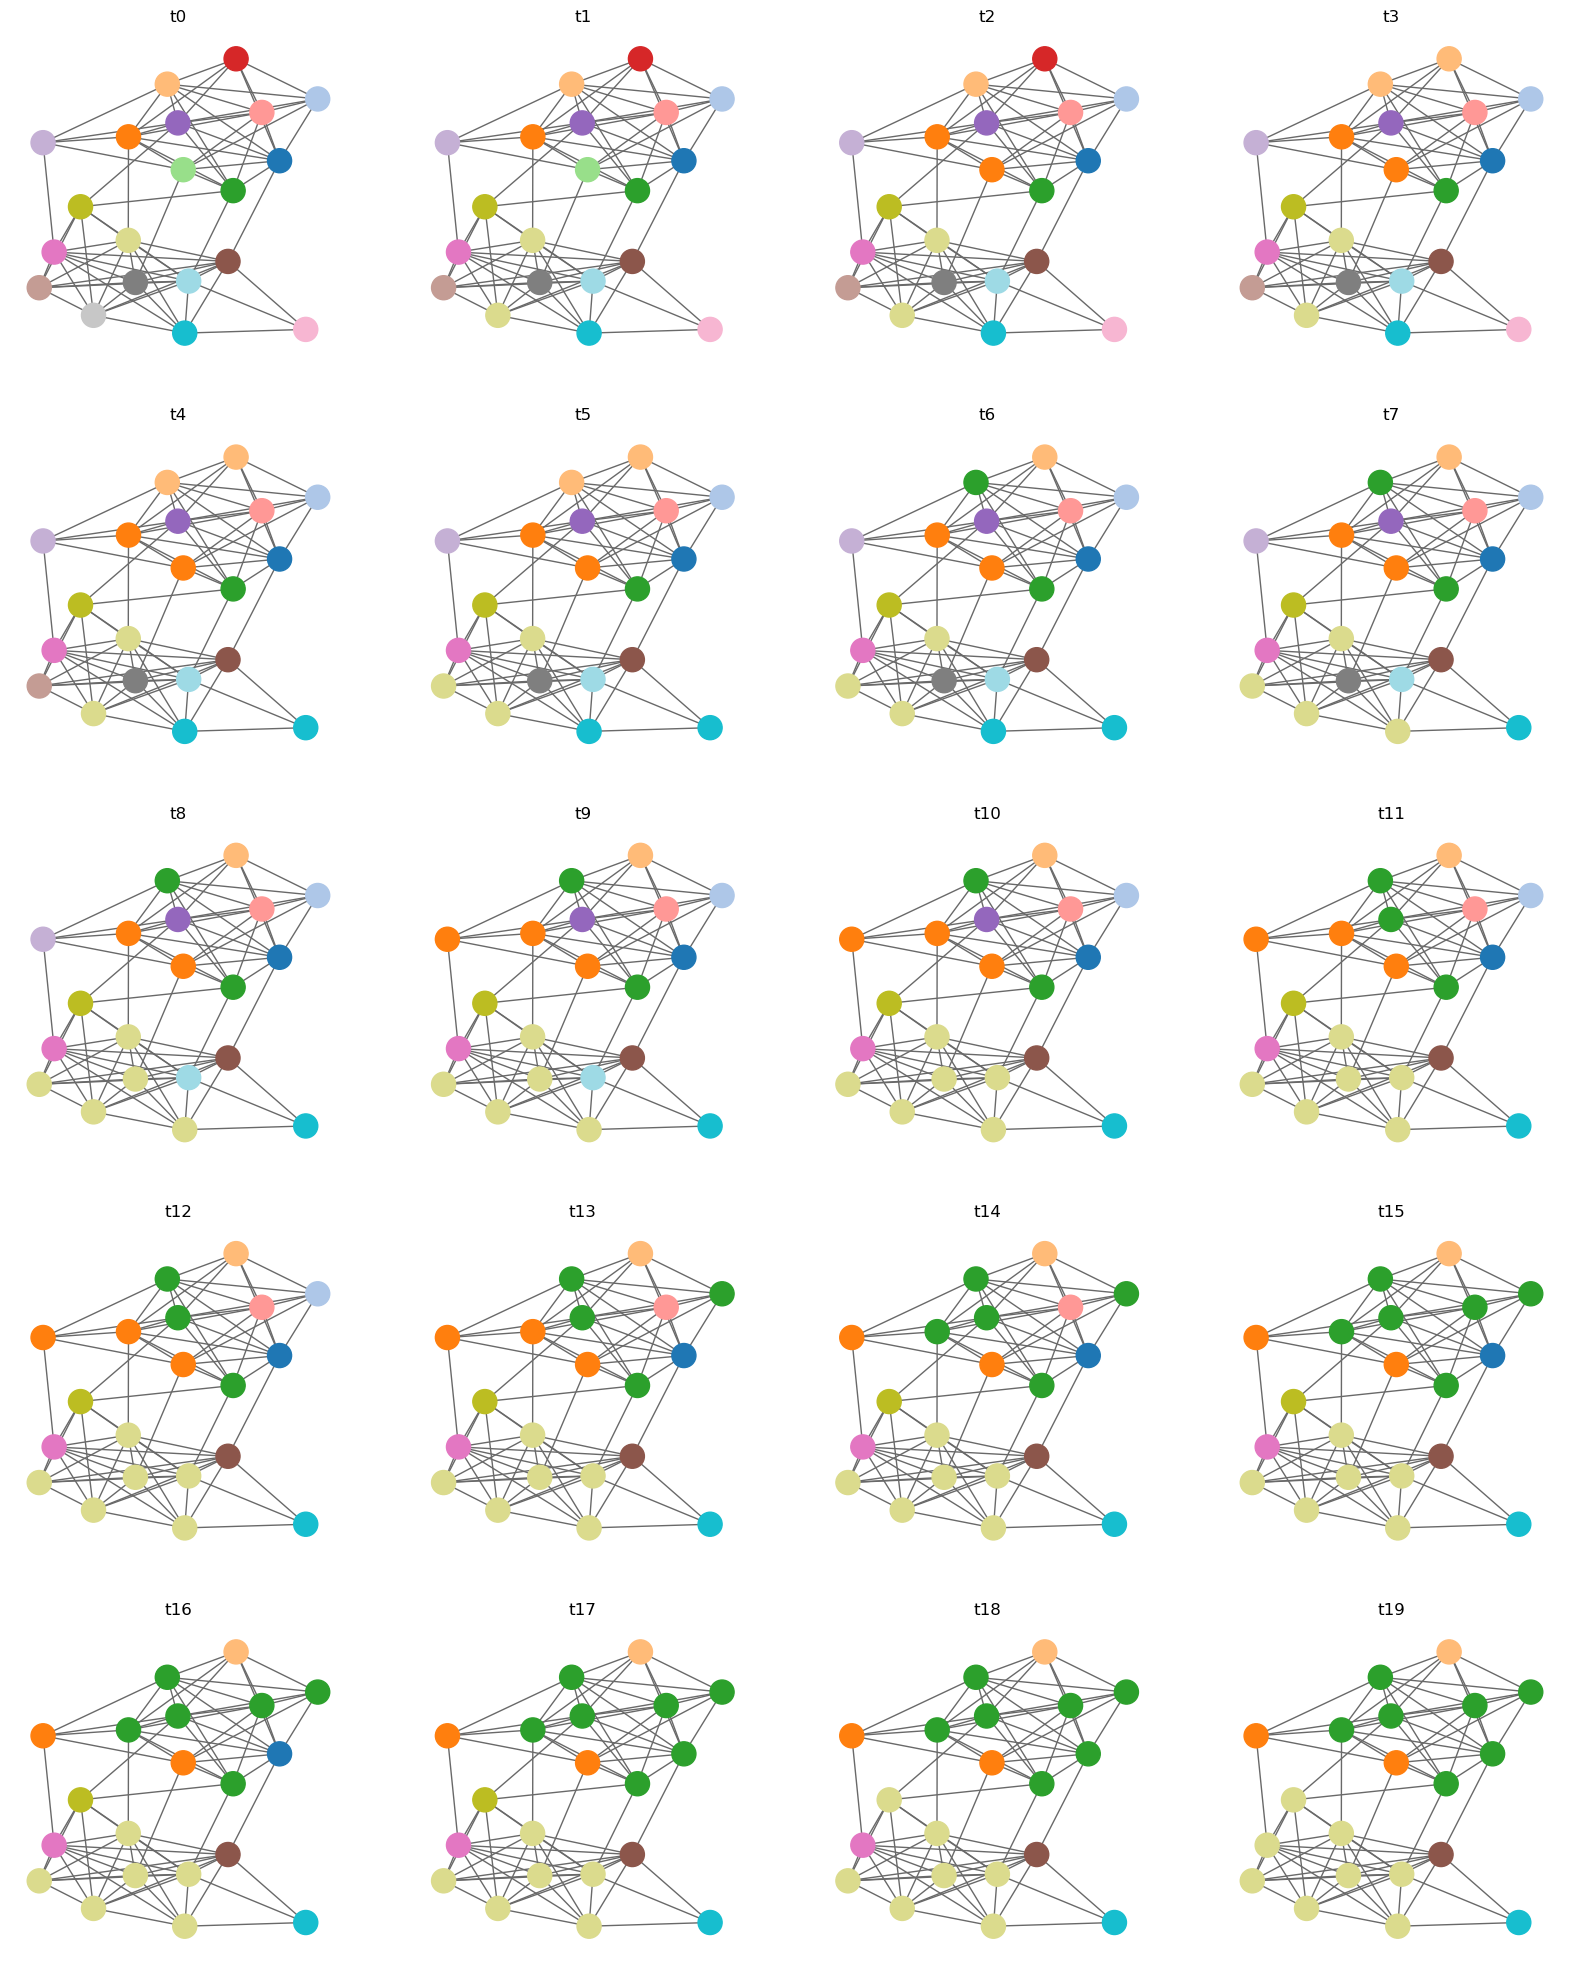

In [41]:
# Se crea un grafo G con dos comunidades de 10 nodos cada una.
G = nx.stochastic_block_model([10,10], [[0.8, 0.1],[0.1,0.8]])
# Se define un diccionario labels donde cada nodo tiene como etiqueta su propio identificador k
labels = {k: k for k in G.nodes}

N=4 # 4 columnas
M=5 # 5 filas
fig, axs = plt.subplots(M, N, figsize=(N*5,M*5))
pos = nx.kamada_kawai_layout(G)

n_steps = G.number_of_nodes()
interval = n_steps // (N*M)

order = np.random.choice(G.nodes, G.number_of_nodes(), replace=False)
for t in range(n_steps):

    if t % interval == 0:

        i = (t//interval)//N
        j = (t//interval)%N
    
        ax = axs[i][j]
        ax.set_title(f"t{t}")

        draw_labels(ax)

    ### LABEL PROPAGATION
    # La funci칩n do_iteration(N) realiza un paso iterativo sobre el nodo 洧녜 del grafo 洧냨 G para actualizar su etiqueta bas치ndose
    # en las etiquetas de sus vecinos. Este tipo de iteraci칩n es t칤pico en procesos de detecci칩n de comunidades o simulaciones de
    # din치micas de influencia en redes, como la propagaci칩n de estados o la formaci칩n de consenso.
    do_iteration(order[t])

# Louvain

El algoritmo Louvain es un m칠todo para detectar comunidades en un grafo no dirigido. Est치 dise침ado para ser r치pido y escalable, lo que lo hace adecuado para grafos grandes. Se ejecuta en dos fases principales de manera iterativa hasta alcanzar un estado 칩ptimo.

## Source code

### Delta modularity

In [43]:
# Funci칩n para calcular el cambio en la modularidad si un nodo `n` es removido de su comunidad
def delta_remove(n):

    # Funci칩n auxiliar para calcular la contribuci칩n al cambio de modularidad al remover un nodo `i`
    def process_node(i):
        # Esta f칩rmula calcula la diferencia entre el peso de la arista (i, n) y el t칠rmino de conexi칩n esperado entre
        # los grados de los nodos `i` y `n`, normalizado por el n칰mero total de aristas `m`
        return A[i-1][n-1] - (G.degree(i) * G.degree(n)) / (2 * m)
    
    # `m` es el n칰mero total de aristas en el grafo
    m = G.number_of_edges()
    
    # `A` es la matriz de adyacencia del grafo `G`, donde cada elemento A[i][j] es el peso de la arista entre los nodos i y j
    # La matriz se crea y convierte en una matriz densa (2D)
    A = nx.adjacency_matrix(G, nodelist=np.sort(G.nodes)).todense()

    # `to_communities_dict(coms)` devuelve un diccionario que mapea cada comunidad a los nodos que la pertenecen
    list_coms = to_communities_dict(coms)
    
    # `nodes` son los nodos de la comunidad a la que pertenece `n`, pero excluyendo a `n`
    nodes = set(list_coms[coms[n]]).difference({n})

    # Se calculan los valores de contribuci칩n al cambio de modularidad para cada nodo en `nodes`
    values = np.array([process_node(i) for i in nodes])
    
    # El cambio total al remover el nodo `n` es la suma de los valores calculados, multiplicada por -1/m
    return -(1/m) * values.sum()


# Funci칩n para calcular el cambio en la modularidad si un nodo `n` es insertado en una comunidad `cid`
def delta_insert(n, cid):

    # Funci칩n auxiliar para calcular la contribuci칩n al cambio de modularidad al insertar un nodo `i`
    def process_node(i):
        # Similar a la funci칩n `delta_remove`, calcula el cambio en la modularidad por la inserci칩n del nodo `i`
        return A[i-1][n-1] - (G.degree(i) * G.degree(n)) / (2 * m)

    # `m` es el n칰mero total de aristas en el grafo
    m = G.number_of_edges()
    
    # `A` es la matriz de adyacencia del grafo `G`, convertida en una matriz densa (2D)
    A = nx.adjacency_matrix(G, nodelist=np.sort(G.nodes)).todense()

    # Se obtiene la lista de nodos en la comunidad `cid`
    list_coms = to_communities_dict(coms)
    
    # `nodes` son los nodos de la comunidad `cid`, pero excluyendo a `n`
    nodes = set(list_coms[cid]).difference({n})

    # Se calculan los valores de contribuci칩n al cambio de modularidad para cada nodo en `nodes`
    values = np.array([process_node(i) for i in nodes])
    
    # El cambio total al insertar el nodo `n` es la suma de los valores calculados, multiplicada por 1/m
    return (1/m) * values.sum()


# Funci칩n para calcular el cambio total en la modularidad al mover el nodo `n` a la comunidad `cid`
def delta_move(n, cid):
    # El cambio total es la suma de la remoci칩n del nodo de su comunidad actual y la inserci칩n en la nueva comunidad
    return delta_remove(n) + delta_insert(n, cid)

#### Test Delta modularity

In [44]:
# En el c칩digo que proporcionas, coms es un diccionario que asigna una comunidad inicial a cada nodo del grafo G.
coms = {n: n-1 for n in G.nodes}
print(f"move 1 to community 0: {delta_move(1,0)}")
print(f"move 2 to community 0: {delta_move(2,0)}")
print(f"move 5 to community 0: {delta_move(5,0)}")

move 1 to community 0: 0.0
move 2 to community 0: 0.00848337950138504
move 5 to community 0: 0.009522160664819942


In [45]:
coms = {n: n-1 for n in G.nodes}
q_before = nx.community.modularity(G, to_communities_list(coms))
coms[2] = 0
q_after = nx.community.modularity(G, to_communities_list(coms))
print(f"move 2 to community 0: {q_after - q_before}")

coms = {n: n-1 for n in G.nodes}
q_before = nx.community.modularity(G, to_communities_list(coms))
coms[5] = 0
q_after = nx.community.modularity(G, to_communities_list(coms))
print(f"move 5 to community 0: {q_after - q_before}")

move 2 to community 0: -0.004674515235457068
move 5 to community 0: 0.009522160664819944


In [46]:
coms = {n: n-1 for n in G.nodes}
coms[2] = 0
print(f"move 1 to community 0: {delta_move(1,0)}")
print(f"move 2 to community 0: {delta_move(2,0)}")
print(f"move 3 to community 0: {delta_move(3,0)}")
print(f"move 5 to community 0: {delta_move(5,0)}")

move 1 to community 0: 0.0
move 2 to community 0: 0.0
move 3 to community 0: 0.0027700831024930752
move 5 to community 0: 0.004068559556786702


In [47]:
coms = {n: n-1 for n in G.nodes}
coms[2] = 0
q_before = nx.community.modularity(G, to_communities_list(coms))

coms[3] = 0
q_after = nx.community.modularity(G, to_communities_list(coms))
print(f"move 3 to community 0: {q_after - q_before}")
coms[3] = 2

coms[5] = 0
q_after = nx.community.modularity(G, to_communities_list(coms))
print(f"move 5 to community 0: {q_after - q_before}")
coms[5] = 4

move 3 to community 0: 0.01592797783933518
move 5 to community 0: 0.01722645429362881


### Fase I

In [48]:
# Funci칩n para encontrar el mejor movimiento de un nodo `n` a otra comunidad
def best_move(n, threshold=1e-4):
    # `other_coms` obtiene una lista de todas las comunidades a las que podr칤a moverse el nodo `n`
    # Excluye la comunidad actual del nodo, que se obtiene de `coms[n]`
    other_coms = np.unique(list(coms.values()))
    
    # Usamos `np.vectorize` para aplicar la funci칩n `delta_move` a cada comunidad posible
    # `delta_move(n, cid=x)` calcula el cambio en la modularidad al mover `n` a la comunidad `x`
    vdelta = np.vectorize(lambda x: delta_move(n=n,cid=x))
    
    # Calculamos los cambios en la modularidad (deltas) para cada comunidad
    deltas = vdelta(other_coms)
    
    # Si el cambio m치ximo en la modularidad es mayor que el umbral, retornamos la comunidad con el mejor cambio
    if deltas.max() > threshold:
        return other_coms[int(deltas.argmax())]
    else:
        # Si no hay cambios significativos (por debajo del umbral), no movemos el nodo
        return None

# Funci칩n que realiza los movimientos de los nodos en la lista `nodes` a las comunidades con el mejor cambio en modularidad
def do_moves(nodes, draw=True):
    has_change = False  # Flag para verificar si alg칰n nodo cambi칩 de comunidad
    
    # Itera sobre todos los nodos
    for n in nodes:
        # Encuentra la mejor comunidad a la que mover el nodo `n`
        new_com = best_move(n)
        
        # Si hay un movimiento v치lido (es decir, el nodo tiene una comunidad diferente a la actual)
        if new_com is not None and new_com != coms[n]:
            # Realizamos el cambio de comunidad
            coms[n] = new_com
            print(f"{n} -> {new_com}")  # Imprime el cambio de comunidad
            has_change = True  # Indicamos que hubo un cambio
            
            # Si la opci칩n `draw` es True, dibujamos las comunidades actuales
            if draw:
                _, ax = plt.subplots(1, figsize=(2, 2))
                draw_communities(coms, ax)  # Funci칩n que dibuja las comunidades del grafo

    # Retorna si hubo alg칰n cambio en las comunidades
    return has_change

# Funci칩n que ejecuta la primera fase del algoritmo de detecci칩n de comunidades
def fase_one():
    nodes = list(G.nodes)  # Obtenemos una lista de todos los nodos del grafo
    while True:
        # Mezclamos aleatoriamente el orden de los nodos (para evitar sesgo en el orden de iteraci칩n)
        np.random.shuffle(list(G.nodes))
        
        # Realizamos los movimientos de los nodos en sus comunidades correspondientes
        has_change = do_moves(nodes)

        # Si no hubo cambios, terminamos la fase
        if not has_change:
            break

### Fase II

In [49]:
# Funci칩n que calcula el n칰mero de aristas dentro de una comunidad `cid`
def intra_community_edges(cid):
    # Convierte las comunidades actuales a un diccionario, donde las claves son los ids de comunidad
    # y los valores son las listas de nodos pertenecientes a esas comunidades
    list_coms = to_communities_dict(coms) 
    
    # Obtiene los nodos que pertenecen a la comunidad `cid`
    nodes = list_coms[cid]

    # Creamos un subgrafo con los nodos de la comunidad `cid`
    sg = nx.subgraph(G, nodes)

    # Retorna el n칰mero de aristas dentro de la comunidad `cid`
    return sg.number_of_edges()

# Funci칩n que calcula el peso de las aristas entre dos conjuntos de nodos `nodes_1` y `nodes_2`
def calculate_edge_weight(nodes_1, nodes_2):
    weight = 0  # Inicializamos el peso a 0
    # Itera sobre todos los nodos en `nodes_1` y `nodes_2`
    for node_1 in nodes_1:
        for node_2 in nodes_2:
            # Si existe una arista entre `node_1` y `node_2`, sumamos su peso
            if G.has_edge(node_1, node_2):
                weight += G.edges[node_1, node_2]["weight"]
    
    # Retorna el peso total de las aristas entre `nodes_1` y `nodes_2`
    return weight    
    
# Funci칩n que ejecuta la segunda fase del algoritmo de detecci칩n de comunidades
def fase_two():
    # Creamos un nuevo grafo `G_new` donde las comunidades del grafo original `G` son los nodos
    # y las aristas entre comunidades se definen por los pesos de las aristas entre los nodos
    # que pertenecen a diferentes comunidades.
    G_new = nx.quotient_graph(
        G,  # Grafo original
        partition=to_communities_dict(coms),  # Diccionario de particiones (comunidades)
        edge_data=lambda sx, sy: {"weight": calculate_edge_weight(sx, sy)},  # Calculamos los pesos de las aristas
    )

    # Renombramos los nodos del nuevo grafo con los ids de las comunidades a las que pertenecen
    G_new = nx.relabel_nodes(G_new, {s: coms[list(s).pop()] for s in G_new.nodes()})

    # Para cada comunidad, a침adimos una arista dentro de la comunidad con el peso calculado por `intra_community_edges`.
    # Cada comunidad en el grafo G_new tiene una arista a s칤 misma que refleja el peso total de las aristas dentro de la comunidad en el grafo original.
    for c_id in np.unique(list(coms.values())):
        G_new.add_edge(c_id, c_id, weight=intra_community_edges(c_id))

    # Retorna el nuevo grafo `G_new` que representa las comunidades como nodos
    return G_new

## Example

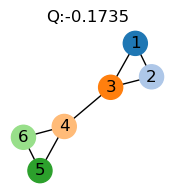

In [50]:
G = nx.from_edgelist([
    (1,2),
    (1,3),
    (2,3),
    (3,4),
    (4,5),
    (4,6),
    (5,6)
])
nx.set_edge_attributes(G, 1, "weight")

_,ax = plt.subplots(1,figsize=(2,2))
coms = {n: n-1 for n in G.nodes}

draw_communities(coms,ax)

1 -> 1
3 -> 1
4 -> 4
5 -> 5
4 -> 5


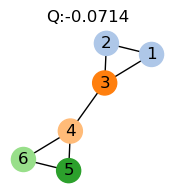

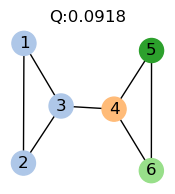

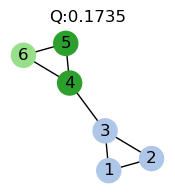

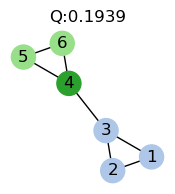

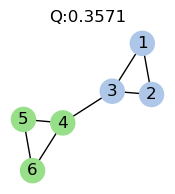

In [51]:
fase_one()

{(1, 5): Text(0.0, 0.0, '1'),
 (1, 1): Text(1.0, 4.371138828673794e-08, '3'),
 (5, 5): Text(-1.0, -4.371138828673794e-08, '3')}

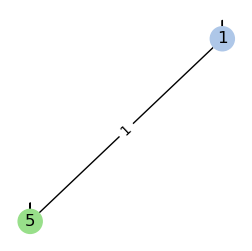

In [53]:
G_new = fase_two()
_,ax = plt.subplots(1,figsize=(3,3))

colors = assign_colors(list(G_new.nodes))
labels = nx.get_edge_attributes(G,'weight')

pos = nx.kamada_kawai_layout(G_new)
nx.draw(G_new, ax=ax, with_labels=True, node_color=colors, pos=pos)
labels = nx.get_edge_attributes(G_new,'weight')
nx.draw_networkx_edge_labels(G_new,pos,edge_labels=labels)

## Implementacion en Networkx

In [54]:
list(nx.community.louvain_communities(G))

[{1, 2, 3}, {4, 5, 6}]

# Modularidad

Text(0.5, 1.0, 'Modularity: 0.5416')

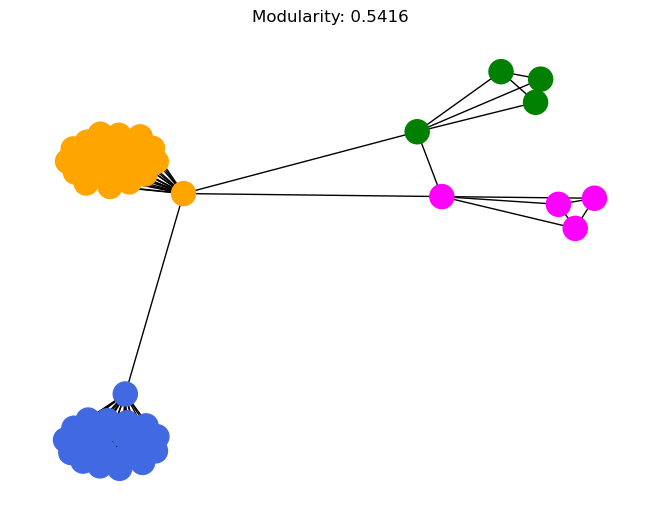

In [60]:
import numpy as np
import networkx as nx

# Funci칩n para a침adir un "clique" (grafo completo) de tama침o `n` al grafo `G` y asignar un color a sus nodos
def add_clique(G, n, color):
    N = G.number_of_nodes()  # N칰mero actual de nodos en el grafo original G
    clique = nx.complete_graph(n)  # Crear un nuevo grafo completo (clique) de tama침o `n`
    
    # Asignar el color proporcionado a todos los nodos del nuevo clique
    nx.set_node_attributes(clique, color, "color")
    
    # Renombrar los nodos del clique para que sus identificadores no entren en conflicto con los del grafo original
    labels = {n: n+N for n in G.nodes}  # Renombrar los nodos del clique a침adiendo `N` al nombre de cada nodo
    clique = nx.relabel_nodes(clique, labels)  # Aplicar los nuevos nombres a los nodos del clique

    # A침adir los nodos y las aristas del clique al grafo original `G`
    G.add_nodes_from(clique.nodes(data=True))  # A침adir nodos del clique al grafo G con sus atributos (color)
    G.add_edges_from(clique.edges)  # A침adir las aristas del clique al grafo G

    return clique  # Retorna el grafo del clique creado

# Funci칩n para crear un ejemplo de grafo con m칰ltiples cliques y conexiones entre ellos
def example_graph(m, p):
    # Crear un grafo completo con `m` nodos
    G = nx.complete_graph(m)
    
    # Asignar el color "royalBlue" a todos los nodos del grafo original G
    nx.set_node_attributes(G, "royalBlue", "color")
    
    # Seleccionar un nodo aleatorio del grafo original `G` (esto ser치 el punto de inicio de la comunidad 1)
    c1_point = np.random.choice(G.nodes)
    
    # A침adir un clique de tama침o `m` al grafo con color "orange" y seleccionar un nodo aleatorio de este clique
    c2 = add_clique(G, m, "orange")
    c2_point = np.random.choice(c2.nodes)
    
    # A침adir un clique de tama침o `p` al grafo con color "green" y seleccionar un nodo aleatorio de este clique
    c3 = add_clique(G, p, "green")
    c3_point = np.random.choice(c3.nodes)
    
    # A침adir otro clique de tama침o `p` al grafo con color "magenta" y seleccionar un nodo aleatorio de este clique
    c4 = add_clique(G, p, "magenta")
    c4_point = np.random.choice(c4.nodes)
    
    # Conectar nodos seleccionados aleatoriamente entre los diferentes cliques
    # Estas aristas representan las conexiones entre diferentes comunidades (cliques)
    G.add_edge(c1_point, c2_point)  # Conectar un nodo del clique 1 con uno del clique 2
    G.add_edge(c2_point, c3_point)  # Conectar un nodo del clique 2 con uno del clique 3
    G.add_edge(c2_point, c4_point)  # Conectar un nodo del clique 2 con uno del clique 4
    G.add_edge(c3_point, c4_point)  # Conectar un nodo del clique 3 con uno del clique 4

    return G  # Retornar el grafo completo con los cliques y sus conexiones

G = example_graph(20, 4)

colors = [d["color"] for _,d in G.nodes(data=True)]
nx.draw(G, node_color=colors)
plt.title(f"Modularity: {q:.4f}")


Text(0.5, 1.0, 'Modularity: 0.5416')

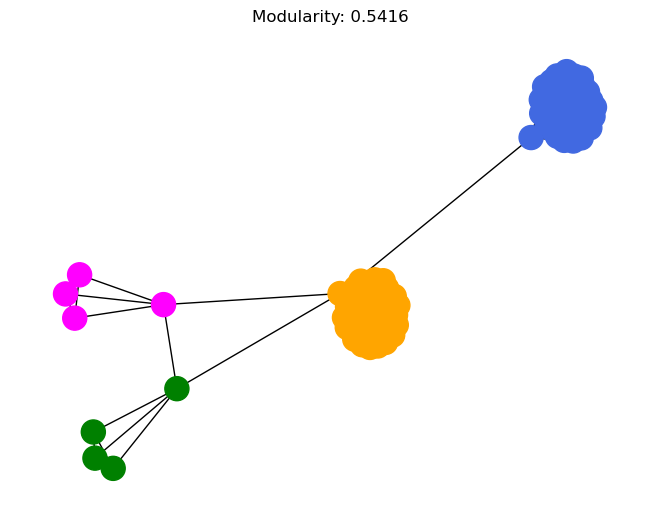

In [59]:
G = example_graph(40, 4)

colors = [d["color"] for _,d in G.nodes(data=True)]
nx.draw(G, node_color=colors)
plt.title(f"Modularity: {q:.4f}")

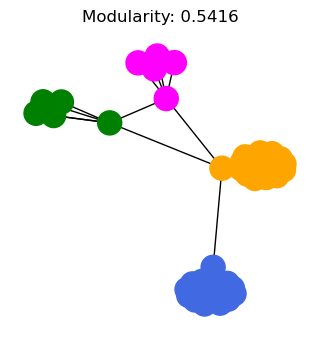

In [62]:
import matplotlib.pyplot as plt  # Importar la librer칤a de visualizaci칩n de gr치ficos

# Crear un grafo de ejemplo con 20 nodos en el primer clique (comunidad) y 5 nodos en cada uno de los siguientes
G = example_graph(20, 5)

# Configurar el tama침o de la figura para la visualizaci칩n
plt.figure(figsize=(3, 3))

# Obtener todos los nodos y sus atributos de color
nodes, data = zip(*list(G.nodes(data=True)))

# Convertir los atributos de los nodos (como el color) en un DataFrame de pandas
df_coms = pd.DataFrame(data, index=nodes).reset_index().groupby("color").aggregate(lambda x: list(x))

# Calcular la modularidad de la partici칩n del grafo utilizando los colores de las comunidades como partici칩n
q = nx.community.modularity(G, df_coms["index"].values.tolist())

# Crear una lista de colores para los nodos, basada en el atributo "color" de cada nodo
colors = [d["color"] for _, d in G.nodes(data=True)]

# Dibujar el grafo, coloreando los nodos seg칰n su comunidad (atributo "color")
nx.draw(G, node_color=colors)

# T칤tulo de la visualizaci칩n mostrando el valor de la modularidad calculada
plt.title(f"Modularity: {q:.4f}")

# Mostrar el gr치fico generado
plt.show()

Encontrar la modularidad m치xima es equivalente a buscar el equilibrio ideal entre el n칰mero de t칠rminos en la suma, es decir, el n칰mero de m칩dulos, y el valor de cada t칠rmino

Text(0.5, 1.0, 'Modularity: 0.5426')

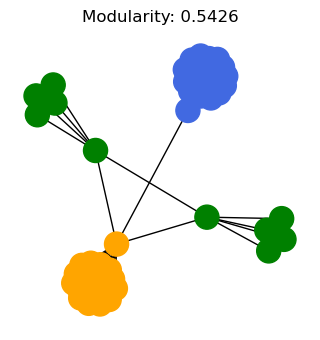

In [64]:
import matplotlib.pyplot as plt

G = example_graph(20,5)

for n,d in G.nodes(data=True):
    if d["color"] == "magenta":
        G.nodes[n]["color"]="green"

nodes, data = zip(*list(G.nodes(data=True)))
df_coms = pd.DataFrame(data, index=nodes).reset_index().groupby("color").aggregate(lambda x: list(x))
q = nx.community.modularity(G, df_coms["index"].values.tolist())

plt.figure(figsize=(3,3))

colors = [d["color"] for _,d in G.nodes(data=True)]
nx.draw(G, node_color=colors)
plt.title(f"Modularity: {q:.4f}")

# Leiden

In [66]:
!pip install cdlib

     ---------------------------------------- 0.0/204.6 kB ? eta -:--:--
     ----- ------------------------------- 30.7/204.6 kB 640.0 kB/s eta 0:00:01
     ---------------------- --------------- 122.9/204.6 kB 1.2 MB/s eta 0:00:01
     ------------------------------------ - 194.6/204.6 kB 1.7 MB/s eta 0:00:01
     -------------------------------------- 204.6/204.6 kB 1.2 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
   ---------------------------------------- 0.0/263.6 kB ? eta -:--:--
   ----------------------- ---------------- 153.6/263.6 kB 4.6 MB/s eta 0:00:01
   ---------------------------------------- 263.6/263.6 kB 3.2 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.0 MB ? eta -:--:--
   --- ------------------------------------ 0.2/2.0 MB 5.0 MB/s eta 0:00:01
   --------- ------------------------------ 0.5/2.0 MB 6.0 MB/s eta 0:00:01
   -------------------- ------------------- 1.0/2.0 M

In [70]:
!pip install igraph leidenalg graph_tool infomap leidenalg wurlitzer bayanpy pyclustering ASLPAw --quiet

ERROR: Could not find a version that satisfies the requirement graph_tool (from versions: none)
ERROR: No matching distribution found for graph_tool


ModuleNotFoundError: Optional dependency not satisfied: install igraph and leidenalg to use the selected feature.

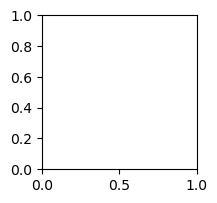

In [72]:
from cdlib.algorithms import leiden

G = nx.from_edgelist([
    (1,2),
    (1,3),
    (2,3),
    (3,4),
    (4,5),
    (4,6),
    (5,6)
])
nx.set_edge_attributes(G, 1, "weight")

_,ax = plt.subplots(1,figsize=(2,2))
leiden_coms = leiden(G).to_node_community_map()
print(leiden_coms)

coms = {k:v[0] for k,v in leiden(G).to_node_community_map().items()}
draw_communities(coms,ax)

# Clique Percolation Method

In [ ]:
import networkx as nx

G = nx.from_edgelist([
    (0,1),
    (0,2),
    (0,3),
    (1,2),
    (1,3),
    (1,4),
    (1,5),
    (2,3),
    (2,7),
    (2,8),
    (3,5),
    (3,6),
    (3,7),
    (3,8),
    (3,9),
    (4,5),
    (4,6),
    (5,9),
    (5,8),
    (5,7),
    (5,6),
    (6,7),
    (6,9),
    (6,8),
    (7,8)
])

_,ax = plt.subplots(1,figsize=(3,3))
nx.draw(G, ax=ax, with_labels=True)

## Find all maximal cliques

In [ ]:
cliques = list(nx.find_cliques(G))

_,axs = plt.subplots(1,len(cliques),figsize=(3*len(cliques),3))
colormap = plt.cm.tab10

for cid, nodes in enumerate(cliques):
    
    colors = ["orange" if n in nodes else "darkgray" for n in G.nodes]
    edges = ["black" if u in nodes and v in nodes else "darkgray" for u,v in G.edges]
    style = ["-" if u in nodes and v in nodes else "--" for u,v in G.edges]
    nx.draw_kamada_kawai(G, node_color=colors, edge_color=edges, style=style, ax=axs[cid], with_labels=True)

## Make clique-clique overlap matrix

### Sources

In [ ]:
import numpy as np

def overlap_nodes(clique_1, clique_2):
    return len(set(clique_1).intersection(set(clique_2)))

def draw_overlap_cliques(clique_1, clique_2, ax):
    overlap = set(clique_1).intersection(set(clique_2))
    all = set(clique_1).union(set(clique_2))
    
    colors = ["green" if n in overlap else ("royalBlue" if n in clique_1 else ("orange" if n in clique_2 else "gray")) for n in G.nodes]
    edges = ["black" if u in all and v in all else "darkgray" for u,v in G.edges]
    style = ["-" if u in all and v in all else "--" for u,v in G.edges]
    nx.draw_kamada_kawai(G, node_color=colors, edge_color=edges, style=style, ax=ax, with_labels=True)

_,ax = plt.subplots(1,figsize=(3,3))
draw_overlap_cliques(cliques[0], cliques[1], ax)
ax.set_title(f"N췈 nodes overlap: {overlap_nodes(cliques[0], cliques[1])}")

### Create matrix

In [ ]:
import numpy as np
import seaborn as sns
from itertools import product

N = len(cliques)
m_clique_o = np.array([overlap_nodes(cliques[u],cliques[v]) for u,v in product(range(N), repeat=2)]).reshape(N,N)

sns.heatmap(m_clique_o, cmap="Blues", annot=True)

### Clean matrix

In [ ]:
K = 4

# remove the cliques smaller than K
np.fill_diagonal(m_clique_o, np.where(np.diag(m_clique_o) < K, 0, np.diag(m_clique_o)))

# remove the connections smaller than K-1
m_clique_o[m_clique_o < (K-1)] = 0

# remove weights
m_clique_o[m_clique_o > 0] = 1

# make clique graph
G_cliques = nx.from_numpy_array(m_clique_o)

# remove sporius communities and self loops
G_cliques.remove_nodes_from([n for n in G_cliques.nodes if not G_cliques.has_edge(n,n)])
G_cliques.remove_edges_from(nx.selfloop_edges(G_cliques))

_,ax = plt.subplots(1,figsize=(2,2))
nx.draw_kamada_kawai(G_cliques, ax=ax, with_labels=True)

## Create graph and find communities

In [ ]:
from functools import reduce

flaten = lambda c: reduce(lambda x,y: x.union(y), c, set())

communities = nx.community.louvain_communities(G_cliques)
communities = [flaten([cliques[n] for n in com]) for com in communities]

_,ax = plt.subplots(1,figsize=(3,3))
draw_overlap_cliques(communities[0], communities[1],ax) 

In [ ]:
nx_communities = list(nx.community.k_clique_communities(G, k=4))

_,ax = plt.subplots(1,figsize=(3,3))
draw_overlap_cliques(nx_communities[0], nx_communities[1],ax) 

In [ ]:
G = nx.karate_club_graph()

## LABEL PROPAGATION

In [ ]:
### LABEL PROPAGATION

# Se define un diccionario labels donde cada nodo tiene como etiqueta su propio identificador k
labels = {k: k for k in G.nodes}

N=4 # 4 columnas
M=5 # 5 filas
fig, axs = plt.subplots(M, N, figsize=(N*5,M*5))
pos = nx.kamada_kawai_layout(G)

n_steps = G.number_of_nodes()
interval = n_steps // (N*M)

order = np.random.choice(G.nodes, G.number_of_nodes(), replace=False)
for t in range(n_steps):

    if t % interval == 0:

        i = (t//interval)//N
        j = (t//interval)%N
    
        ax = axs[i][j]
        ax.set_title(f"t{t}")

        draw_labels(ax)

    ### LABEL PROPAGATION
    # La funci칩n do_iteration(N) realiza un paso iterativo sobre el nodo 洧녜 del grafo 洧냨 G para actualizar su etiqueta bas치ndose
    # en las etiquetas de sus vecinos. Este tipo de iteraci칩n es t칤pico en procesos de detecci칩n de comunidades o simulaciones de
    # din치micas de influencia en redes, como la propagaci칩n de estados o la formaci칩n de consenso.
    do_iteration(order[t])